In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, minmax_scale, robust_scale

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [3]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy import stats
import scipy.stats

# Boston Housing

In [5]:
df = pd.read_csv('BOSTON_HOUSING.csv', engine = 'python')
df_y = df['MEDV']
df_raw_x = df.drop('MEDV', axis = 1, inplace = False)

In [6]:
df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [7]:
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## 데이터 속성 및 기술통계량 확인

### 목표 변수 및 설명 변수 분포확인

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e1fc7a890>,
      dtype=object)

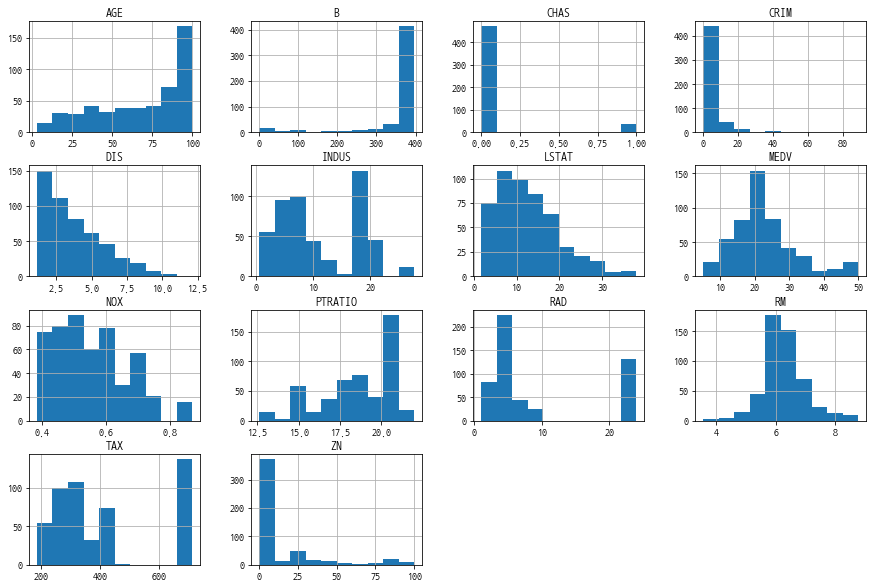

In [8]:
df.hist(figsize = (15,10))

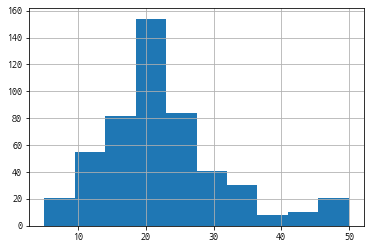

In [9]:
df.MEDV.hist()

### 목표변수"MEDV"와 설명변수 간의  상관성 분석

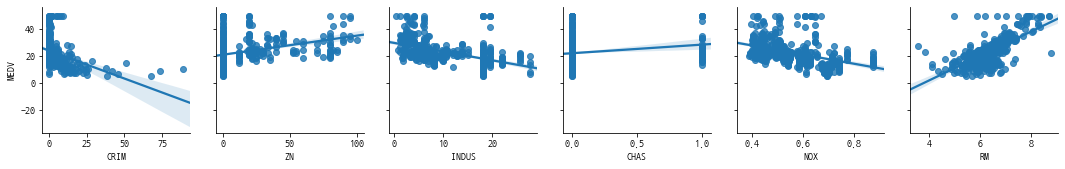

In [12]:
sns.pairplot(df, y_vars = "MEDV", x_vars = df_raw_x.columns[:6], kind = 'reg')

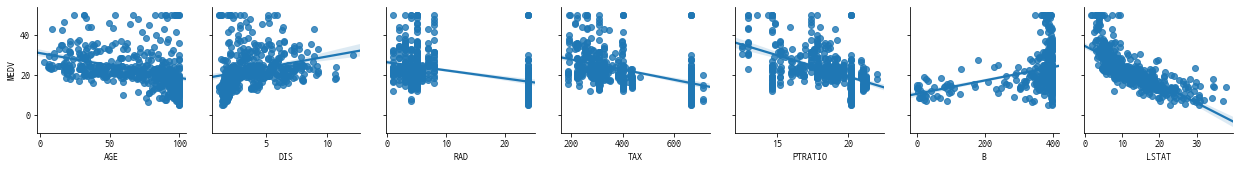

In [14]:
sns.pairplot(df, y_vars = "MEDV", x_vars = df_raw_x.columns[6:], kind = 'reg')

그래프로 봤을 때는 선형 관계를 가지는 변수가 LSTAT, RM, CRIM, INDUS, NOX, PTRATIO가 있다. 

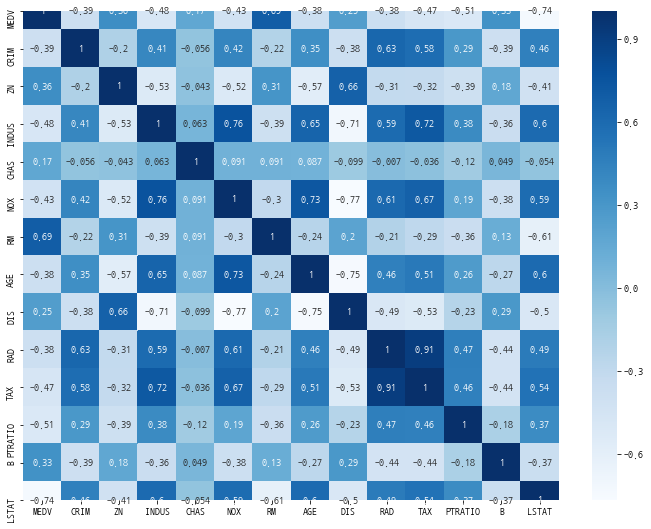

In [15]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(method = 'pearson').round(3), annot = True, cmap = 'Blues')

In [17]:
df.corr().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489


목표변수 'MEDV'와의 상관분석 수치결과 상관성의 절대값이 <br>
0.5이상인 변수는 LSTAT, RM, PTRATIO <br>
0.3이상 0.5이하는 CRIM, ZN, INDUS, NOX, AGE, RAD, TAX, B   
0.3이하 DIS, CHAS

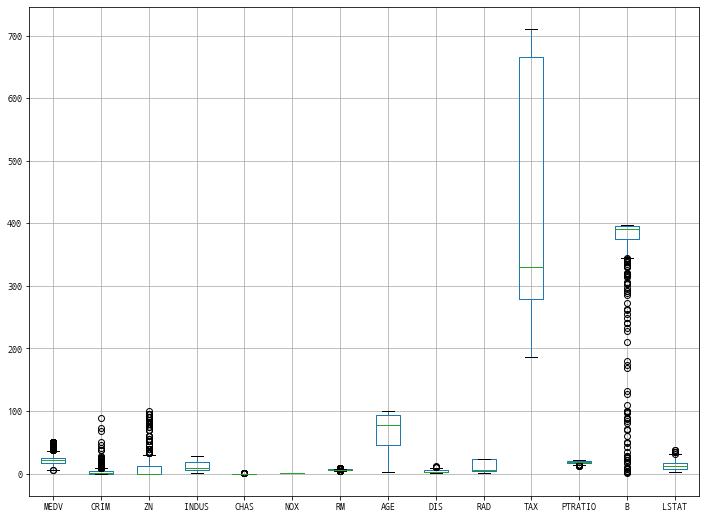

In [18]:
df.boxplot(figsize = (12,9))

## CHAS 강 조망(1-조망, 0-비조망)

In [19]:
chas_0 = pd.DataFrame({"CHAS_0" : df.MEDV[df.CHAS==0]})
chas_1 = pd.DataFrame({"CHAS_1" : df.MEDV[df.CHAS==1]})

from scipy.stats import shapiro
from scipy.stats import levene
#d1정규성 만족/d2정규성 불만족 -> 원래 2-sample t-test 쓰면 안된다!
print(shapiro(chas_0))
print(shapiro(chas_1))


from scipy import stats
import scipy.stats
#등분산성 만족
print(stats.levene(chas_0['CHAS_0'], chas_1['CHAS_1']))

t_result = stats.ttest_ind(chas_0, chas_1, equal_var = False)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

(0.9282605051994324, 3.113930960958397e-14)
(0.8359232544898987, 0.00011230883683310822)
LeveneResult(statistic=4.590342071304883, pvalue=0.03263097878646009)
2-Sample t-test
t:[-3.113]
p:[0.004]


정규성 만족하는지 검정했을 때 둘 다 만족 안했음 / t 검정통계량이 음의 값이 나왔으므로 조망인 경우보다 비조망인 경우 집값이 더 크다고 할 수 있다고 pvalue값이 0.05보다 작으므로 두집단간의 차이가 있다고 해석할 수 있다. 따라서 CHAS 강 조망 변수를 집값 예측하는데에 넣기로함

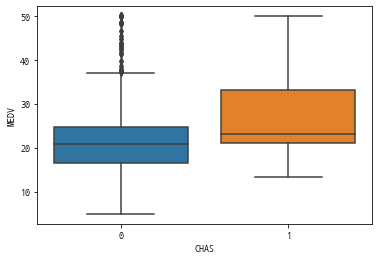

In [20]:
sns.boxplot(x = 'CHAS', y = 'MEDV', data = df)

# Crim 중위수 기준

In [21]:
crim_0 = pd.DataFrame({"Crim_0" : df.MEDV[df.CRIM<np.median(df.CRIM)]})
crim_1 = pd.DataFrame({"Crim_1" : df.MEDV[df.CHAS>=np.median(df.CRIM)]})


print(shapiro(crim_0))
print(shapiro(crim_1))

print(stats.levene(crim_0['Crim_0'], crim_1['Crim_1']))

t_result = stats.ttest_ind(crim_0, crim_1, equal_var = False)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

(0.903469443321228, 1.1272606112444628e-11)
(0.8359232544898987, 0.00011230883683310822)
LeveneResult(statistic=11.322971693133866, pvalue=0.0008701752138540356)
2-Sample t-test
t:[-1.704]
p:[0.097]


중위값을 기준으로 나눈 범죄율 그룹간의 차이는 유의수준 0.05에서 없다고 나옴

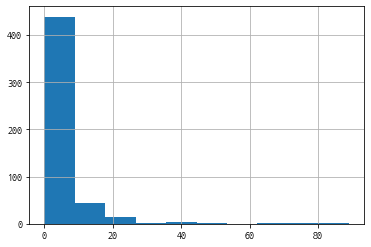

In [22]:
df['CRIM'].hist()

In [23]:
df.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


## ZN 중위수 기준

In [24]:
zn_0 = pd.DataFrame({"zn_0" : df.MEDV[df.ZN==np.median(df.ZN)]})
zn_1 = pd.DataFrame({"zn_1" : df.MEDV[df.ZN>np.median(df.ZN)]})


print(shapiro(zn_0))
print(shapiro(zn_1))
print(stats.levene(zn_0['zn_0'], zn_1['zn_1']))

t_result = stats.ttest_ind(zn_0, zn_1, equal_var = False)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

(0.8783591389656067, 1.5093558019810196e-16)
(0.9147244691848755, 3.6262400726627675e-07)
LeveneResult(statistic=1.2681094348399924, pvalue=0.2606575637173762)
2-Sample t-test
t:[-9.13]
p:[0.]


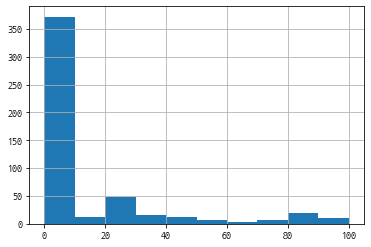

In [25]:
df['ZN'].hist()

주거지 비율이 0인경우와 0보다 큰 그룹으로 나눈 결과,
그룹간의 차이가 있다.   
t검정통계량이 음의 값이므로 주거지 비율이 높을수록 주택가격이 높다고 해석할 수 있다.

## 비소매업 비율

In [26]:
indus_0 = pd.DataFrame({"indus_0" : df.MEDV[df.INDUS<np.median(df.INDUS)]})
indus_1 = pd.DataFrame({"indus_1" : df.MEDV[df.INDUS>=np.median(df.INDUS)]})


print(shapiro(indus_0))
print(shapiro(indus_1))
print(stats.levene(indus_0['indus_0'], indus_1['indus_1']))

t_result = stats.ttest_ind(indus_0, indus_1, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

(0.9181320667266846, 1.7274977281989123e-10)
(0.8276516199111938, 3.6091854183335043e-16)
LeveneResult(statistic=3.323192626810172, pvalue=0.06890132329675194)
2-Sample t-test
t:[10.59]
p:[0.]


비소매업의 비율을 중위값을 기준으로 나눈 결과, 그룹간의 차이가 있다.  
t검정통계량이 양의 값이므로 비소매업 비율이 낮을수록 주택가격이 높다고 해석할 수 있다.

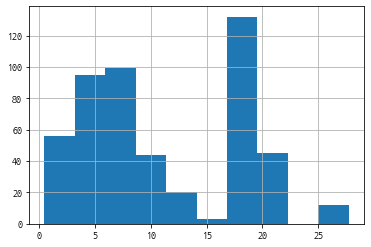

In [27]:
df['INDUS'].hist()

In [134]:
#파생변수 생성
df['INDUS_01'] = 0
df.loc[df.INDUS>=np.median(df.INDUS),'INDUS_01'] = 1 

## 산화질소 농도

In [28]:
nox_0 = pd.DataFrame({"nox_0" : df.MEDV[df.NOX<np.median(df.NOX)]})
nox_1 = pd.DataFrame({"nox_1" : df.MEDV[df.NOX>=np.median(df.NOX)]})


print(shapiro(indus_0))
print(shapiro(indus_1))
print(stats.levene(nox_0['nox_0'], nox_1['nox_1']))

t_result = stats.ttest_ind(nox_0, nox_1, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

(0.9181320667266846, 1.7274977281989123e-10)
(0.8276516199111938, 3.6091854183335043e-16)
LeveneResult(statistic=0.9902129179845365, pvalue=0.3201678445098617)
2-Sample t-test
t:[9.971]
p:[0.]


산화질소 농도를 중위값을 기준으로 나눈 결과, 그룹간의 차이가 있다.  
t검정통계량이 양의 값이므로 산화질소 농도가 낮을수록 주택가격이 높다고 해석할 수 있다.

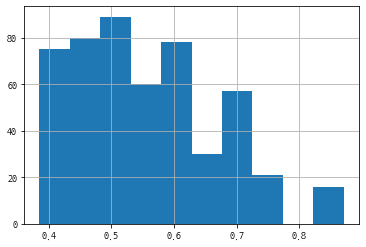

In [29]:
df['NOX'].hist()

## 주거당 평균 객실 수

In [30]:
rm_0 = pd.DataFrame({"rm_0" : df.MEDV[df.RM<np.median(df.RM)]})
rm_1 = pd.DataFrame({"rm_1" : df.MEDV[df.RM>=np.median(df.RM)]})


print(shapiro(indus_0))
print(shapiro(indus_1))
print(stats.levene(rm_0['rm_0'], rm_1['rm_1']))

t_result = stats.ttest_ind(rm_0, rm_1, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

(0.9181320667266846, 1.7274977281989123e-10)
(0.8276516199111938, 3.6091854183335043e-16)
LeveneResult(statistic=51.06506263070739, pvalue=3.150351953148336e-12)
2-Sample t-test
t:[-12.046]
p:[0.]


주거당 평균 객실수를 중위값을 기준으로 나눈 결과, 그룹간의 차이가 있다.  
t검정통계량이 음의 값이므로 주거당 평균 객실수가 높을수록 주택가격이 높다고 해석할 수 있다.

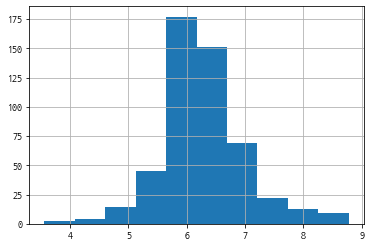

In [31]:
df['RM'].hist()

## 노후 건물 비율

In [32]:
age_0 = pd.DataFrame({"age_0" : df.MEDV[df.AGE<np.median(df.AGE)]})
age_1 = pd.DataFrame({"age_1" : df.MEDV[df.AGE>=np.median(df.AGE)]})

t_result = stats.ttest_ind(age_0, age_1, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[8.561]
p:[0.]


노후 건물 비율을 중위값을 기준으로 나눈 결과, 그룹간의 차이가 있다.  
t검정통계량이 양의 값이므로 노후 건물 비율이 낮을수록 주택가격이 높다고 해석할 수 있다.

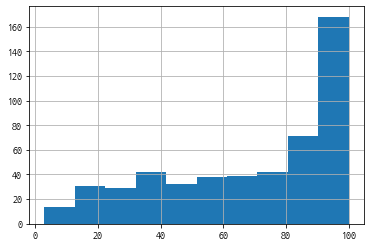

In [33]:
df['AGE'].hist()

## 중심지 접근 거리

In [34]:
dis_0 = pd.DataFrame({"dis_0" : df.MEDV[df.DIS<np.median(df.DIS)]})
dis_1 = pd.DataFrame({"dis_1" : df.MEDV[df.DIS>=np.median(df.DIS)]})

t_result = stats.ttest_ind(dis_0, dis_1, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[-6.362]
p:[0.]


중심지 접근 거리를 중위값을 기준으로 나눈 결과, 그룹간의 차이가 있다.
t검정통계량이 음의 값이므로 중심지 접근 거리가 높을수록 주택가격이 높다고 해석할 수 있다.

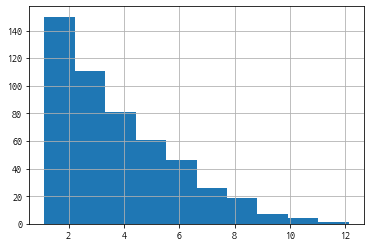

In [35]:
df['DIS'].hist()

## 고속도로 접근 편이성 지수

In [36]:
rad_0 = pd.DataFrame({"rad_0" : df.MEDV[df.RAD<20]})
rad_1 = pd.DataFrame({"rad_1" : df.MEDV[df.RAD>=20]})

t_result = stats.ttest_ind(rad_0, rad_1, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[9.69]
p:[0.]


고속도로 접근 편이성 지수를 중위값을 기준으로 나눈 결과, 그룹간의 차이가 있다.
t검정통계량이 양의 값이므로 고속도로 접근 편이성 지수가 낮을수록 주택가격이 높다고 해석할 수 있다.

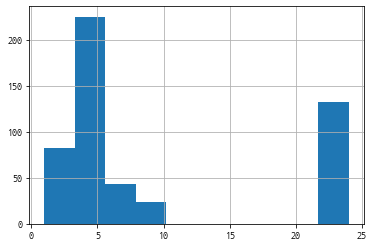

In [37]:
df['RAD'].hist()

In [38]:
df.RAD.median()

5.0

In [133]:
#파생변수 생성
df['RAD_01'] = 0
df.loc[df.RAD>=20,'RAD_01'] = 1 

## 재산세율

In [39]:
tax_0 = pd.DataFrame({"tax_0" : df.MEDV[df.TAX<600]})
tax_1 = pd.DataFrame({"tax_1" : df.MEDV[df.TAX>=600]})

t_result = stats.ttest_ind(tax_0, tax_1, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[10.246]
p:[0.]


재산세율을 중위값을 기준으로 나눈 결과, 그룹간의 차이가 있다.
t검정통계량이 양의 값이므로 재산세율 낮을수록 주택가격이 높다고 해석할 수 있다.

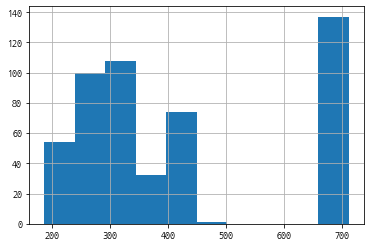

In [40]:
df['TAX'].hist()

In [41]:
df.TAX.median()

330.0

In [132]:
#파생변수 생성
df['TAX_01'] = 0
df.loc[df.TAX>=600,'TAX_01'] = 1 

## 학생당 교사 비율

In [42]:
ptratio_0 = pd.DataFrame({"ptratio_0" : df.MEDV[df.PTRATIO<np.median(df.PTRATIO)]})
ptratio_1 = pd.DataFrame({"ptratio_1" : df.MEDV[df.PTRATIO>=np.median(df.PTRATIO)]})

t_result = stats.ttest_ind(ptratio_0, ptratio_1, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[12.328]
p:[0.]


학생당 교사 비율을 중위값을 기준으로 나눈 결과, 그룹간의 차이가 있다.
t검정통계량이 양의 값이므로 학생당 교사 비율이 낮을수록 주택가격이 높다고 해석할 수 있다.

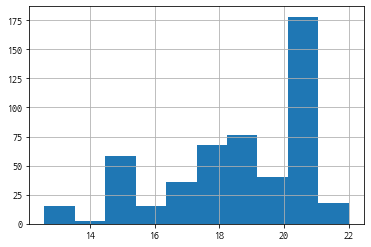

In [43]:
df['PTRATIO'].hist()

In [44]:
df['PTRATIO'].median()

19.05000019

## 흑인 인구 비율

In [45]:
b_0 = pd.DataFrame({"b_0" : df.MEDV[df.B<np.median(df.B)]})
b_1 = pd.DataFrame({"b_1" : df.MEDV[df.B>=np.median(df.B)]})

t_result = stats.ttest_ind(b_0, b_1, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[-0.679]
p:[0.497]


흑인 인구 비율을 중위값을 기준으로 나눈 결과, 그룹간의 차이가 없다.

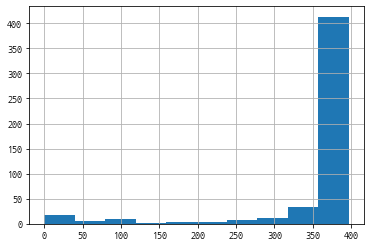

In [46]:
df['B'].hist()

In [47]:
df['B'].median()

391.44000244999995

## 저소득층 비율

In [48]:
lstat_0 = pd.DataFrame({"lstat_0" : df.MEDV[df.LSTAT<np.median(df.LSTAT)]})
lstat_1 = pd.DataFrame({"lstat_1" : df.MEDV[df.LSTAT>=np.median(df.LSTAT)]})

t_result = stats.ttest_ind(lstat_0, lstat_1, equal_var = True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[18.565]
p:[0.]


저소득층 비율을 중위값을 기준으로 나눈 결과, 그룹간의 차이가 있다.    
t검정통계량이 양의 값이므로 저소득층의 비율이 높을수록 주택가격이 높다고 해석할 수 있다.

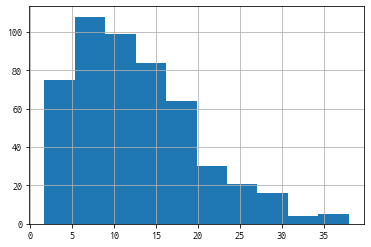

In [49]:
df['LSTAT'].hist()

In [50]:
df['LSTAT'].median()

11.36000013

## 탐색적 기법 바탕으로 모델링 기법

## 회귀분석

In [135]:
df.columns

Index(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'TAX_01', 'RAD_01', 'INDUS_01'],
      dtype='object')

In [137]:
lr_model = smf.ols(formula = 'MEDV~INDUS+NOX+RM+PTRATIO+LSTAT', data= df)
lr_result = lr_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     122.7
Date:                Fri, 07 Feb 2020   Prob (F-statistic):          3.88e-120
Time:                        23:51:32   Log-Likelihood:                -1543.8
No. Observations:                 506   AIC:                             3108.
Df Residuals:                     496   BIC:                             3150.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5225      4.658      4.835      0.0

In [52]:
df_x = df_raw_x.loc[:,['CRIM','INDUS','NOX','RM','PTRATIO','LSTAT']]
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
5,PTRATIO,1.347
1,CRIM,1.368
4,RM,1.692
6,LSTAT,2.527
3,NOX,2.805
2,INDUS,2.922
0,const,337.778


## train/ valid/ test 데이터 셋 분할

In [53]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.4, random_state = 1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size = 0.5, random_state = 1234)

In [54]:
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("valid data X size : {}".format(df_valid_x.shape))
print("valid data Y size : {}".format(df_valid_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (202, 6)
train data Y size : (202,)
valid data X size : (152, 6)
valid data Y size : (152,)
test data X size : (152, 6)
test data Y size : (152,)


## 의사결정나무

In [55]:
train_score = [];valid_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['ValidScore'] = valid_score
df_score_leaf

,MinSamplesLeaf,TrainScore,ValidScore
0,1,1.000000,0.622303
1,2,0.982938,0.645436
2,3,0.896846,0.706470
3,4,0.884583,0.738342
4,5,0.868958,0.725079
5,6,0.847809,0.734769
6,7,0.850732,0.772765
7,8,0.850042,0.765616
8,9,0.801607,0.752180
9,10,0.780648,0.711967


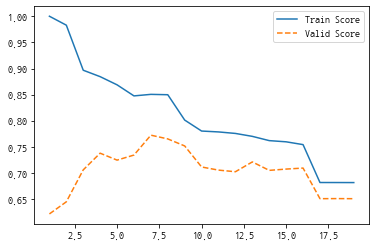

In [56]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "Train Score")
plt.plot(para_leaf, valid_score, linestyle = '--', label = "Valid Score")
plt.legend()

In [57]:
train_score = [];valid_score= []
para_split = [n_split * 2 for n_split in range(7,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 7, 
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['ValidScore'] = valid_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValidScore
0,14,0.851,0.773
1,16,0.851,0.772
2,18,0.848,0.771
3,20,0.833,0.764
4,22,0.832,0.762
5,24,0.828,0.761
6,26,0.817,0.764
7,28,0.812,0.750
8,30,0.810,0.751
9,32,0.810,0.751


In [58]:
train_score = [];valid_score= []
para_depth = [depth for depth in range(1,15)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 7, 
                                 min_samples_split = 14, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidScore'] = valid_score
df_score_depth.round(3)

,Depth,TrainScore,ValidScore
0,1,0.448,0.386
1,2,0.665,0.648
2,3,0.749,0.735
3,4,0.800,0.764
4,5,0.835,0.761
5,6,0.845,0.769
6,7,0.849,0.772
7,8,0.851,0.773
8,9,0.851,0.773
9,10,0.851,0.773


In [59]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 7, min_samples_split = 14, max_depth = 8, random_state= 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [60]:
df_importance = pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,LSTAT,0.751
3,RM,0.176
0,CRIM,0.035
1,INDUS,0.032
2,NOX,0.004
4,PTRATIO,0.001


In [61]:
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.851
Score on test set: 0.770


## 랜덤포레스트

In [62]:
train_score = [];valid_score= []
para_n_tree = [n_tree * 10 for n_tree in range(1,25)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = valid_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.971,0.793
1,20,0.968,0.800
2,30,0.967,0.802
3,40,0.967,0.795
4,50,0.970,0.800
5,60,0.971,0.796
6,70,0.972,0.800
7,80,0.970,0.800
8,90,0.968,0.801
9,100,0.969,0.799


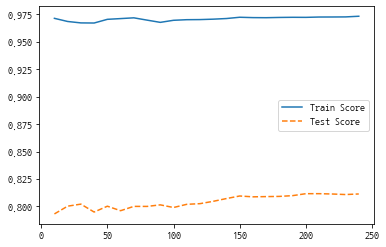

In [63]:
plt.plot(para_n_tree, train_score, linestyle='-', label = "Train Score")
plt.plot(para_n_tree, valid_score, linestyle='--', label = "Test Score")
plt.legend()

In [64]:
train_score = [];valid_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 200,
                                 min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = valid_score
df_score_leaf

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.972162,0.811604
1,2,0.953364,0.817044
2,3,0.927707,0.817997
3,4,0.904680,0.818748
4,5,0.885374,0.822941
5,6,0.865765,0.822671
6,7,0.843560,0.816967
7,8,0.821784,0.805631
8,9,0.800953,0.794449
9,10,0.786401,0.786722


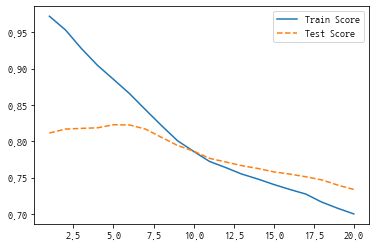

In [65]:
plt.plot(para_leaf, train_score, linestyle='-', label = "Train Score")
plt.plot(para_leaf, valid_score, linestyle='--', label = "Test Score")
plt.legend()

In [67]:
train_score = [];valid_score= []
para_split = [n_split * 2 for n_split in range(5,15)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 200,min_samples_leaf = 5, 
                                 min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = valid_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,10,0.885,0.823
1,12,0.882,0.823
2,14,0.877,0.821
3,16,0.870,0.817
4,18,0.862,0.812
5,20,0.854,0.807
6,22,0.843,0.799
7,24,0.836,0.793
8,26,0.830,0.789
9,28,0.825,0.787


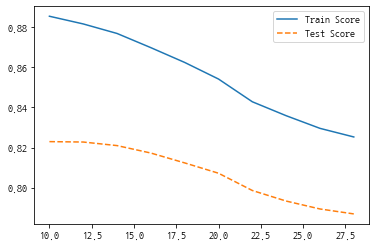

In [68]:
plt.plot(para_split, train_score, linestyle='-', label = "Train Score")
plt.plot(para_split, valid_score, linestyle='--', label = "Test Score")
plt.legend()

In [69]:
train_score = [];valid_score= []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 200, min_samples_leaf = 5, 
                                 min_samples_split = 10, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = valid_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.595,0.601
1,2,0.777,0.773
2,3,0.841,0.804
3,4,0.867,0.818
4,5,0.878,0.823
5,6,0.883,0.823
6,7,0.885,0.823
7,8,0.885,0.823
8,9,0.885,0.823
9,10,0.885,0.823


In [70]:
v_feature_name = df_train_x.columns
rf_final = RandomForestRegressor(n_estimators = 200, min_samples_leaf = 5, min_samples_split = 10, max_depth = 5, random_state= 1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

In [71]:
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.878
Score on test set: 0.863


# 그래디언트부스팅

In [72]:
train_score = [];valid_score= []
para_n_tree = [n_tree * 1 for n_tree in range(10,40)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['ValidScore'] = valid_score
df_score_n.round(3)

,n_estimators,TrainScore,ValidScore
0,10,0.769,0.720
1,11,0.796,0.743
2,12,0.819,0.753
3,13,0.838,0.763
4,14,0.852,0.776
5,15,0.866,0.788
6,16,0.876,0.792
7,17,0.885,0.796
8,18,0.892,0.798
9,19,0.898,0.799


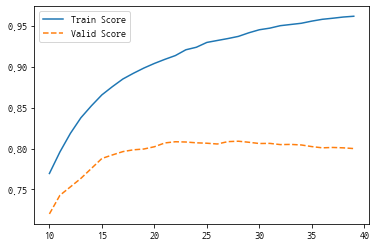

In [73]:
plt.plot(para_n_tree, train_score, linestyle='-', label = "Train Score")
plt.plot(para_n_tree, valid_score, linestyle='--', label = "Valid Score")
plt.legend()

In [74]:
train_score = [];valid_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 28,
                                 min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['ValidScore'] = valid_score
df_score_leaf

,MinSamplesLeaf,TrainScore,ValidScore
0,1,0.937099,0.808941
1,2,0.938285,0.802898
2,3,0.930772,0.812354
3,4,0.925733,0.806586
4,5,0.925675,0.797401
5,6,0.917111,0.798143
6,7,0.911105,0.805091
7,8,0.899495,0.807507
8,9,0.901367,0.811545
9,10,0.874413,0.808449


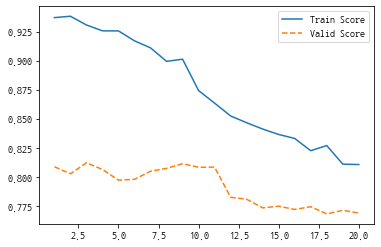

In [75]:
plt.plot(para_leaf, train_score, linestyle='-', label = "Train Score")
plt.plot(para_leaf, valid_score, linestyle='--', label = "Valid Score")
plt.legend()

In [76]:
train_score = [];valid_score= []
para_split = [n_split * 2 for n_split in range(3,20)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 28,min_samples_leaf = 3, 
                                 min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['ValidScore'] = valid_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValidScore
0,6,0.931,0.812
1,8,0.931,0.812
2,10,0.930,0.810
3,12,0.929,0.810
4,14,0.929,0.810
5,16,0.925,0.806
6,18,0.926,0.814
7,20,0.925,0.817
8,22,0.925,0.817
9,24,0.924,0.816


In [77]:
train_score = [];valid_score= []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 28, min_samples_leaf = 3, 
                                 min_samples_split = 20, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidScore'] = valid_score
df_score_depth.round(3)

,Depth,TrainScore,ValidScore
0,1,0.747,0.741
1,2,0.857,0.795
2,3,0.925,0.817
3,4,0.953,0.808
4,5,0.965,0.798
5,6,0.975,0.808
6,7,0.977,0.806
7,8,0.979,0.806
8,9,0.979,0.807
9,10,0.978,0.805


In [79]:
train_score = [];valid_score= []
para_lr = [lr*0.01 for lr in range(1,20)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 28, min_samples_leaf = 3, 
                                 min_samples_split = 20, max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['LearningRate'] = para_lr
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidScore'] = valid_score
df_score_depth.round(3)

,LearningRate,TrainScore,ValidScore
0,0.01,0.350,0.346
1,0.02,0.564,0.543
2,0.03,0.697,0.655
3,0.04,0.780,0.722
4,0.05,0.831,0.762
5,0.06,0.869,0.793
6,0.07,0.884,0.788
7,0.08,0.903,0.806
8,0.09,0.919,0.802
9,0.10,0.925,0.817


In [80]:
v_feature_name = df_train_x.columns
gb_final = GradientBoostingRegressor(n_estimators = 28, min_samples_leaf = 3, min_samples_split = 20, max_depth = 3, learning_rate = 0.1, random_state= 1234)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=20,
                          min_weight_fraction_leaf=0.0, n_estimators=28,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
df_importance = pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,LSTAT,0.601
3,RM,0.244
0,CRIM,0.085
2,NOX,0.054
4,PTRATIO,0.011
1,INDUS,0.005


Text(0, 0.5, '변수')

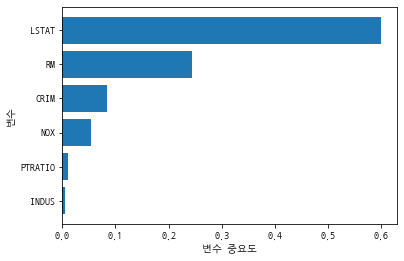

In [82]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [83]:
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.925
Score on test set: 0.868


In [84]:
models = ["회귀분석","의사결정나무","랜덤포레스트","그래디언트부스팅"]
mse, rmse, mae, mape = [],[],[],[]

In [85]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))

In [86]:
dt_y_pred = tree_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [87]:
rf_y_pred = rf_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [88]:
gb_y_pred = gb_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

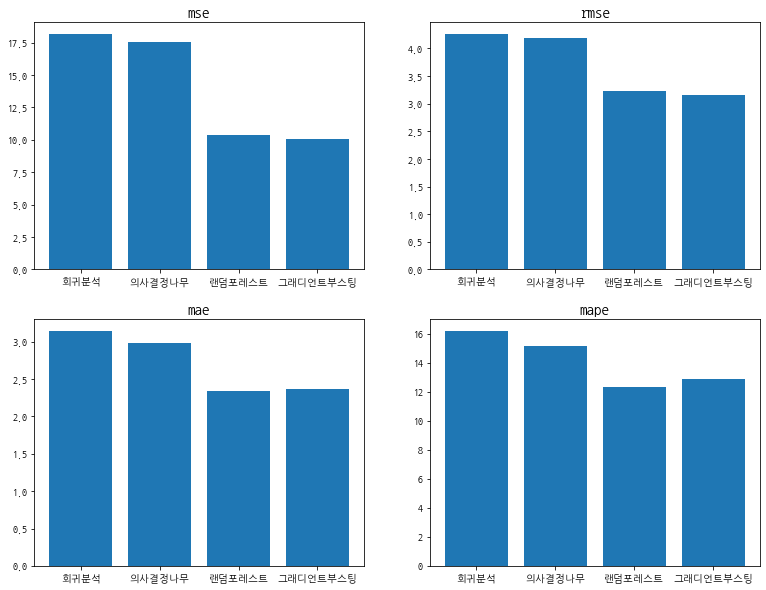

In [89]:
fig, ax = plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)

## 모든 설명변수를 포함한 모델링

In [90]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_y, train_size = 0.4, random_state = 1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size = 0.5, random_state = 1234)

### 회귀분석

In [92]:
lr_model = smf.ols(formula = "MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT", data = df)
lr_result = lr_model.fit()

### 의사결정나무

In [94]:
train_score = [];valid_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['ValidScore'] = valid_score
df_score_leaf

,MinSamplesLeaf,TrainScore,ValidScore
0,1,1.000000,0.658794
1,2,0.986700,0.640791
2,3,0.939882,0.682827
3,4,0.902277,0.719856
4,5,0.872205,0.711014
5,6,0.854043,0.728527
6,7,0.862317,0.756638
7,8,0.869287,0.736772
8,9,0.828127,0.742503
9,10,0.799997,0.723637


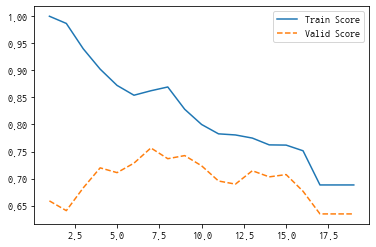

In [95]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "Train Score")
plt.plot(para_leaf, valid_score, linestyle = '--', label = "Valid Score")
plt.legend()

In [96]:
train_score = [];valid_score= []
para_split = [n_split * 2 for n_split in range(7,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 7, 
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['ValidScore'] = valid_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValidScore
0,14,0.862,0.757
1,16,0.861,0.756
2,18,0.857,0.755
3,20,0.847,0.756
4,22,0.847,0.755
5,24,0.843,0.753
6,26,0.825,0.764
7,28,0.822,0.751
8,30,0.822,0.751
9,32,0.822,0.751


In [97]:
train_score = [];valid_score= []
para_depth = [depth for depth in range(1,15)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 7, 
                                 min_samples_split = 14, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    valid_score.append(tree.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidScore'] = valid_score
df_score_depth.round(3)

,Depth,TrainScore,ValidScore
0,1,0.448,0.386
1,2,0.665,0.648
2,3,0.756,0.727
3,4,0.803,0.748
4,5,0.850,0.744
5,6,0.856,0.754
6,7,0.861,0.756
7,8,0.862,0.757
8,9,0.862,0.757
9,10,0.862,0.757


In [98]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 7, min_samples_split = 14, max_depth = 8, random_state= 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [99]:
df_importance = pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.728
5,RM,0.161
6,AGE,0.067
0,CRIM,0.035
4,NOX,0.006
7,DIS,0.002
11,B,0.001
1,ZN,0.000
2,INDUS,0.000
3,CHAS,0.000


In [100]:
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.862
Score on test set: 0.802


### 랜덤포레스트

In [101]:
train_score = [];valid_score= []
para_n_tree = [n_tree * 10 for n_tree in range(1,25)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = valid_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.970,0.803
1,20,0.975,0.814
2,30,0.978,0.810
3,40,0.978,0.811
4,50,0.979,0.815
5,60,0.980,0.812
6,70,0.981,0.816
7,80,0.979,0.815
8,90,0.977,0.818
9,100,0.979,0.811


In [102]:
train_score = [];valid_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 200,
                                 min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = valid_score
df_score_leaf

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.979885,0.820592
1,2,0.963102,0.823103
2,3,0.940936,0.824035
3,4,0.915301,0.823843
4,5,0.892009,0.824782
5,6,0.873282,0.822631
6,7,0.851463,0.818293
7,8,0.830321,0.806655
8,9,0.811329,0.795885
9,10,0.794671,0.787803


In [103]:
train_score = [];valid_score= []
para_split = [n_split * 2 for n_split in range(5,15)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 200,min_samples_leaf = 5, 
                                 min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = valid_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,10,0.892,0.825
1,12,0.888,0.824
2,14,0.883,0.822
3,16,0.875,0.820
4,18,0.868,0.815
5,20,0.859,0.809
6,22,0.847,0.800
7,24,0.840,0.795
8,26,0.835,0.791
9,28,0.830,0.788


In [104]:
train_score = [];valid_score= []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 200, min_samples_leaf = 5, 
                                 min_samples_split = 10, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    valid_score.append(rf.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = valid_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.595,0.601
1,2,0.779,0.773
2,3,0.845,0.804
3,4,0.873,0.819
4,5,0.885,0.824
5,6,0.890,0.824
6,7,0.891,0.825
7,8,0.892,0.825
8,9,0.892,0.825
9,10,0.892,0.825


In [111]:
v_feature_name = df_train_x.columns
rf_final = RandomForestRegressor(n_estimators = 200, min_samples_leaf = 5, min_samples_split = 10, max_depth = 7, random_state= 1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

In [112]:
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.891
Score on test set: 0.876


### 그래디언트

In [113]:
train_score = [];valid_score= []
para_n_tree = [n_tree * 1 for n_tree in range(10,40)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['ValidScore'] = valid_score
df_score_n.round(3)

,n_estimators,TrainScore,ValidScore
0,10,0.786,0.697
1,11,0.810,0.710
2,12,0.830,0.725
3,13,0.849,0.734
4,14,0.865,0.748
5,15,0.878,0.761
6,16,0.889,0.766
7,17,0.900,0.772
8,18,0.908,0.779
9,19,0.916,0.783


In [115]:
train_score = [];valid_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 26,
                                 min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['ValidScore'] = valid_score
df_score_leaf

,MinSamplesLeaf,TrainScore,ValidScore
0,1,0.946258,0.796735
1,2,0.943766,0.797202
2,3,0.940495,0.789705
3,4,0.932904,0.792096
4,5,0.932837,0.803108
5,6,0.920897,0.804152
6,7,0.920899,0.808430
7,8,0.905676,0.809019
8,9,0.902552,0.802846
9,10,0.886114,0.808679


In [120]:
train_score = [];valid_score= []
para_split = [n_split * 2 for n_split in range(8,20)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 26,min_samples_leaf = 8, 
                                 min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['ValidScore'] = valid_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValidScore
0,16,0.906,0.809
1,18,0.906,0.809
2,20,0.906,0.809
3,22,0.903,0.808
4,24,0.901,0.800
5,26,0.906,0.800
6,28,0.905,0.799
7,30,0.897,0.803
8,32,0.897,0.803
9,34,0.905,0.800


In [121]:
train_score = [];valid_score= []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 26, min_samples_leaf = 8, 
                                 min_samples_split = 16, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidScore'] = valid_score
df_score_depth.round(3)

,Depth,TrainScore,ValidScore
0,1,0.736,0.722
1,2,0.861,0.788
2,3,0.906,0.809
3,4,0.930,0.811
4,5,0.940,0.816
5,6,0.947,0.814
6,7,0.948,0.810
7,8,0.947,0.812
8,9,0.948,0.812
9,10,0.948,0.812


In [122]:
train_score = [];valid_score= []
para_lr = [lr*0.01 for lr in range(1,20)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 26, min_samples_leaf = 8, 
                                 min_samples_split = 16, max_depth = 5, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['LearningRate'] = para_lr
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidScore'] = valid_score
df_score_depth.round(3)

,LearningRate,TrainScore,ValidScore
0,0.01,0.352,0.347
1,0.02,0.566,0.552
2,0.03,0.700,0.669
3,0.04,0.784,0.738
4,0.05,0.837,0.775
5,0.06,0.874,0.800
6,0.07,0.900,0.811
7,0.08,0.917,0.814
8,0.09,0.926,0.810
9,0.10,0.940,0.816


In [123]:
v_feature_name = df_train_x.columns
gb_final = GradientBoostingRegressor(n_estimators = 26, min_samples_leaf = 8, min_samples_split = 16, max_depth = 5, learning_rate = 0.1, random_state= 1234)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=16,
                          min_weight_fraction_leaf=0.0, n_estimators=26,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [126]:
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.940
Score on test set: 0.877


In [124]:
models = ["회귀분석","의사결정나무","랜덤포레스트","그래디언트부스팅"]
mse, rmse, mae, mape = [],[],[],[]

lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))

dt_y_pred = tree_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

rf_y_pred = rf_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

gb_y_pred = gb_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

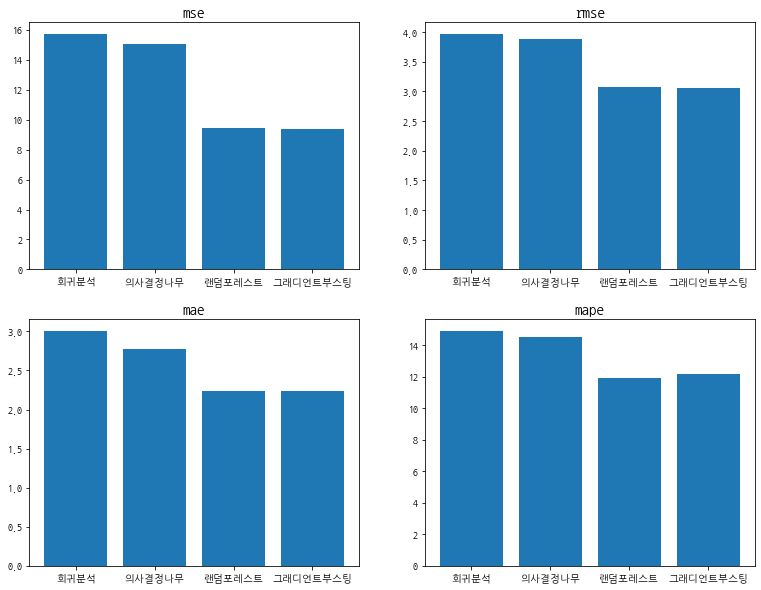

In [125]:
fig, ax = plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)